<a href="https://colab.research.google.com/github/AnshikaGoyal22/Machine-learning/blob/main/experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random

# Helper functions
def random_genre():
    return random.choice(['Action', 'Comedy', 'Drama', 'Horror', 'Romance', 'Adventure'])

def random_date():
    year = random.choice(range(2000, 2024))
    month = random.choice(range(1, 13))
    day = random.choice(range(1, 29))
    return f"{year}-{month:02d}-{day:02d}"

# Create dataset
n_movies = 300
tmdb_data = {
    'budget': np.random.randint(1000000, 200000000, size=n_movies),
    'popularity': np.random.uniform(1, 100, size=n_movies),
    'runtime': np.random.randint(80, 180, size=n_movies),
    'release_date': [random_date() for _ in range(n_movies)],
    'genres': [random_genre() for _ in range(n_movies)],
    'revenue': np.random.randint(500000, 1000000000, size=n_movies)
}

tmdb_df = pd.DataFrame(tmdb_data)
tmdb_df.to_csv('tmdb_box_office_dataset.csv', index=False)

print("Sample TMDB Box Office Dataset created and saved as 'tmdb_box_office_dataset.csv'")
tmdb_df.head()


Sample TMDB Box Office Dataset created and saved as 'tmdb_box_office_dataset.csv'


,budget,popularity,runtime,release_date,genres,revenue
0,198204960,38.636588,155,2005-12-01,Horror,746970989
1,153355303,48.060824,163,2016-08-24,Horror,172498263
2,11244198,66.359543,120,2019-04-12,Adventure,445065357
3,139879323,89.836908,143,2022-12-25,Horror,590313934
4,72836759,37.431197,153,2023-06-23,Romance,755294392


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
data = pd.read_csv('tmdb_box_office_dataset.csv')  # make sure this is the file name
print("\nDataset Loaded!")
data.head()



Dataset Loaded!


,budget,popularity,runtime,release_date,genres,revenue
0,198204960,38.636588,155,2005-12-01,Horror,746970989
1,153355303,48.060824,163,2016-08-24,Horror,172498263
2,11244198,66.359543,120,2019-04-12,Adventure,445065357
3,139879323,89.836908,143,2022-12-25,Horror,590313934
4,72836759,37.431197,153,2023-06-23,Romance,755294392


In [4]:
data.fillna(0, inplace=True)

In [5]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['release_month'] = data['release_date'].dt.month

In [6]:
X = data[['budget', 'popularity', 'runtime', 'release_month']]
y = data['revenue']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [9]:
y_pred = model.predict(X_test)


In [10]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRoot Mean Squared Error:", rmse)


Root Mean Squared Error: 258977103.39587545


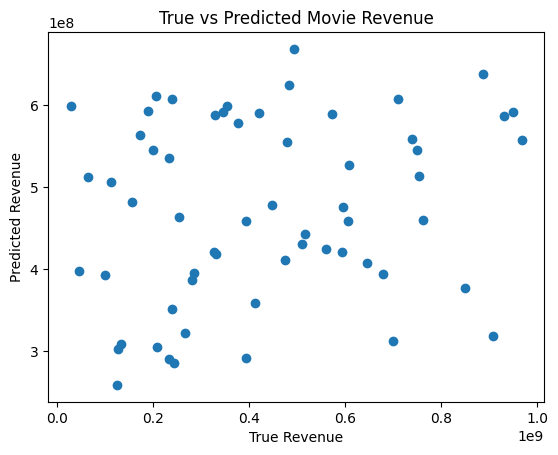


Movie Box Office Revenue Prediction Done!


In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Revenue')
plt.ylabel('Predicted Revenue')
plt.title('True vs Predicted Movie Revenue')
plt.show()

print("\nMovie Box Office Revenue Prediction Done!")